In [1]:
import timeit

import matplotlib.pyplot as plt

In [2]:
N = 100
BASE = 2
R = 65535
X = range(26)
exp = list(2 ** x for x in X)

In [3]:
def pow_mod_by_ast(b: int, e: int) -> int:
    return (b ** e) % R

def pow_mod_by_func(b: int, e: int) -> int:
    return pow(b, e, R)

In [4]:
results_by_ast = []
for e in exp:
    ret = timeit.timeit("pow_mod_by_ast(BASE, e)", globals=globals(), number=N)
    results_by_ast.append(ret)
results_by_ast

[3.300000000017178e-05,
 3.140000000012577e-05,
 3.400000000031156e-05,
 3.179999999991523e-05,
 3.310000000000812e-05,
 4.319999999990998e-05,
 4.099999999995774e-05,
 4.600000000021254e-05,
 5.6299999999787076e-05,
 7.620000000008176e-05,
 0.00012270000000036418,
 0.0002456999999997933,
 0.0006292000000001075,
 0.0017928000000000388,
 0.005321499999999979,
 0.011012099999999858,
 0.026837,
 0.04884540000000026,
 0.09464260000000024,
 0.1886245999999998,
 0.38116170000000027,
 0.7501482999999998,
 1.7877714999999998,
 3.8863273000000005,
 8.022409300000001,
 18.288243800000004]

In [5]:
results_by_func =  []
for e in exp:
    ret = timeit.timeit("pow_mod_by_func(BASE, e)", globals=globals(), number=N)
    results_by_func.append(ret)
results_by_func

[7.080000000314612e-05,
 6.0200000000065756e-05,
 6.0100000006002574e-05,
 6.049999999646616e-05,
 6.189999999861584e-05,
 6.100000000230921e-05,
 6.839999999641577e-05,
 6.160000000221544e-05,
 6.120000000464643e-05,
 6.09000000011406e-05,
 5.9600000000159525e-05,
 5.8499999994410246e-05,
 5.8899999999084685e-05,
 5.840000000034706e-05,
 5.9199999995485086e-05,
 5.790000000160944e-05,
 5.9600000000159525e-05,
 5.8199999998009844e-05,
 5.8299999999178453e-05,
 5.9100000001421904e-05,
 5.8599999995578855e-05,
 5.870000000385289e-05,
 5.810000000394666e-05,
 5.870000000385289e-05,
 5.9300000003759124e-05,
 5.820000000511527e-05]

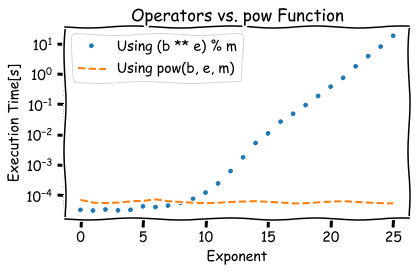

In [6]:
with plt.xkcd():
    fig, ax = plt.subplots()

    line1, = ax.semilogy(X, results_by_ast, ".", label="Using (b ** e) % m")
    line2, = ax.semilogy(X, results_by_func, "--", label="Using pow(b, e, m)")
    ax.set(xlabel="Exponent", ylabel="Execution Time[s]",
       title="Operators vs. pow Function")
    ax.legend()
    ax.grid()
    plt.tight_layout()
    plt.savefig("op_vs_func.png", format="png", dpi=600)